In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
data = pd.read_csv("Covid-19-info.csv")
data

c:\users\win10\appdata\local\programs\python\python38\lib\site-packages\IPython\core\interactiveshell.py:3251: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Unnamed: 0,Date,Country,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Unnamed: 10,Unnamed: 11
0,0,1/22/2020,Afghanistan,0,0,0,0,0,0,0,NaN,NaN
1,1,1/22/2020,Albania,0,0,0,0,0,0,0,NaN,NaN
2,2,1/22/2020,Algeria,0,0,0,0,0,0,0,NaN,NaN
3,3,1/22/2020,Andorra,0,0,0,0,0,0,0,NaN,NaN
4,4,1/22/2020,Angola,0,0,0,0,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
108654,108654,8/6/2021,Vietnam,193381,3016,0,190365,4315,296,0,NaN,NaN
108655,108655,8/6/2021,West Bank and Gaza,317703,3611,0,314092,169,2,0,NaN,NaN
108656,108656,8/6/2021,Yemen,7131,1384,0,5747,27,1,0,NaN,NaN
108657,108657,8/6/2021,Zambia,199135,3459,0,195676,680,12,0,NaN,NaN


In [3]:
data['Date'] = pd.to_datetime(data['Date'])

# For easier access to date
data['DateYearMonth'] = data['Date'].map(lambda date: 100*date.year + date.month)

data.head()

,Unnamed: 0,Date,Country,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Unnamed: 10,Unnamed: 11,DateYearMonth
0,0,2020-01-22,Afghanistan,0,0,0,0,0,0,0,NaN,NaN,202001
1,1,2020-01-22,Albania,0,0,0,0,0,0,0,NaN,NaN,202001
2,2,2020-01-22,Algeria,0,0,0,0,0,0,0,NaN,NaN,202001
3,3,2020-01-22,Andorra,0,0,0,0,0,0,0,NaN,NaN,202001
4,4,2020-01-22,Angola,0,0,0,0,0,0,0,NaN,NaN,202001


In [4]:
data_april = data.query('DateYearMonth==202004')
data_april

,Unnamed: 0,Date,Country,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Unnamed: 10,Unnamed: 11,DateYearMonth
13510,13510,2020-04-01,Afghanistan,197,4,5,188,22,0,0,NaN,NaN,202004
13511,13511,2020-04-01,Albania,259,15,67,177,16,0,15,NaN,NaN,202004
13512,13512,2020-04-01,Algeria,847,58,61,728,131,14,15,NaN,NaN,202004
13513,13513,2020-04-01,Andorra,390,14,10,366,14,2,0,NaN,NaN,202004
13514,13514,2020-04-01,Angola,8,2,1,5,1,0,0,NaN,NaN,202004
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19295,19295,2020-04-30,Vietnam,270,0,219,51,0,0,-3,NaN,NaN,202004
19296,19296,2020-04-30,West Bank and Gaza,344,2,76,266,0,0,5,NaN,NaN,202004
19297,19297,2020-04-30,Yemen,6,2,1,3,0,2,1,NaN,NaN,202004
19298,19298,2020-04-30,Zambia,106,3,55,48,9,0,1,NaN,NaN,202004


In [5]:
data_untilApril_active= data_april.groupby(['Country'])['Active'].sum().reset_index()
data_untilApril_active

,Country,Active
0,Afghanistan,23257
1,Albania,7002
2,Algeria,36228
3,Andorra,12553
4,Angola,412
...,...,...
188,Vietnam,2772
189,West Bank and Gaza,6839
190,Yemen,28
191,Zambia,892


In [6]:
most_active = data_untilApril_active.sort_values(by=['Active'], ascending=False)
most_active.head(8)

,Country,Active
179,US,17142781
84,Italy,3017835
183,United Kingdom,2856248
162,Spain,2621463
61,France,2028962
178,Turkey,1671945
65,Germany,1636325
142,Russia,1023297


In [7]:
data_iran = data.loc[(data['Country']=='Iran')]
data_iran

,Unnamed: 0,Date,Country,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Unnamed: 10,Unnamed: 11,DateYearMonth
80,80,2020-01-22,Iran,0,0,0,0,0,0,0,NaN,NaN,202001
273,273,2020-01-23,Iran,0,0,0,0,0,0,0,NaN,NaN,202001
466,466,2020-01-24,Iran,0,0,0,0,0,0,0,NaN,NaN,202001
659,659,2020-01-25,Iran,0,0,0,0,0,0,0,NaN,NaN,202001
852,852,2020-01-26,Iran,0,0,0,0,0,0,0,NaN,NaN,202001
...,...,...,...,...,...,...,...,...,...,...,...,...,...
107774,107774,2021-08-02,Iran,3940708,91407,3404533,444768,37189,411,19338,NaN,NaN,202108
107967,107967,2021-08-03,Iran,3979727,91785,3424650,463292,39019,378,20117,NaN,NaN,202108
108160,108160,2021-08-04,Iran,4019084,92194,3444798,482092,39357,409,20148,NaN,NaN,202108
108353,108353,2021-08-05,Iran,4057758,92628,0,3965130,38674,434,-3444798,NaN,NaN,202108


In [8]:
newCase_death_iran = data_iran.groupby(['New deaths'])['New cases'].sum().reset_index()
newCase_death_iran

,New deaths,New cases
0,0,3
1,1,10
2,2,15
3,3,59
4,4,52
...,...,...
266,480,13421
267,482,27313
268,483,13721
269,486,13053


In [9]:
data_iran_2021َََJuly = data_iran.query("DateYearMonth == 202107").reset_index(drop=True)
data_iran_2021َََJuly['Day'] = data_iran_2021َََJuly['Date'].map(lambda date: date.day)

data_iran_2021َََJuly.head()

,Unnamed: 0,Date,Country,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Unnamed: 10,Unnamed: 11,DateYearMonth,Day
0,101598,2021-07-01,Iran,3218860,84389,2889939,244532,14303,125,13111,NaN,NaN,202107,1
1,101791,2021-07-02,Iran,3232696,84516,2902140,246040,13836,127,12201,NaN,NaN,202107,2
2,101984,2021-07-03,Iran,3241037,84627,2914830,241580,8341,111,12690,NaN,NaN,202107,3
3,102177,2021-07-04,Iran,3254818,84792,2926266,243760,13781,165,11436,NaN,NaN,202107,4
4,102370,2021-07-05,Iran,3270843,84949,2940874,245020,16025,157,14608,NaN,NaN,202107,5


Text(0.5, 1.0, 'New Cases VS New Deaths in IRAN On 2021July')

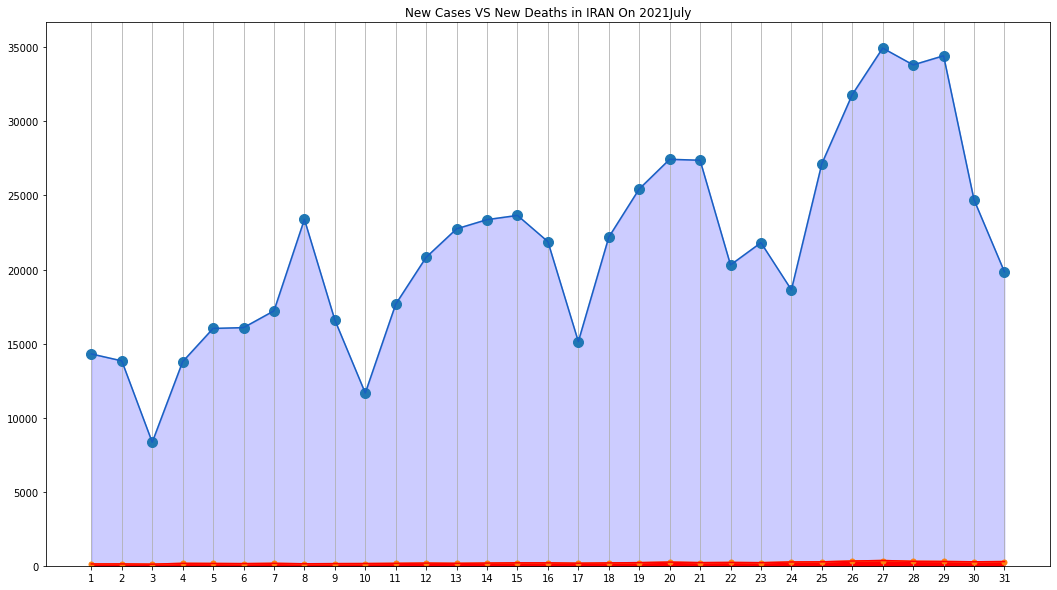

In [48]:
plt.figure(figsize=(18,10))

plt.plot(data_iran_2021َََJuly['Day'].to_numpy(dtype=str), data_iran_2021َََJuly['New cases'], marker='o', label='New Cases',ms = 10)

plt.plot(data_iran_2021َََJuly['Day'].to_numpy(dtype=str), data_iran_2021َََJuly['New deaths'],marker='o', label='New Deaths', ms = 5)
data_iran_2021َََJuly['New cases'].plot.area(color = 'b',alpha=0.2)
data_iran_2021َََJuly['New deaths'].plot.area(color = 'red')

plt.grid(axis = 'x')
plt.title('New Cases VS New Deaths in IRAN On 2021July')